In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
file = pd.read_csv("creditcard.csv")



1.0


(array([189399.,  37661.,  17440.,  10585.,   6401.,   4603.,   3188.,
          2435.,   1794.,   1702.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 10 Patch objects>)

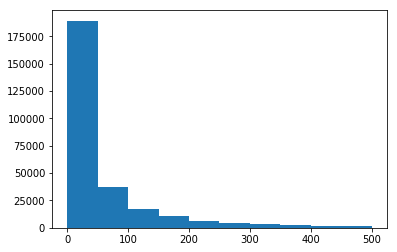

In [25]:
non_fraud = file[(file["Class"] == 0)]
amount = non_fraud[["Amount"]]
amount = amount.to_numpy()
print(len(amount) / len(file[file["Class"] == 0]))
plt.hist(amount, range=[0, 500])




492


(array([305.,  57.,  31.,  14.,  11.,  11.,  15.,   6.,   2.,   5.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 10 Patch objects>)

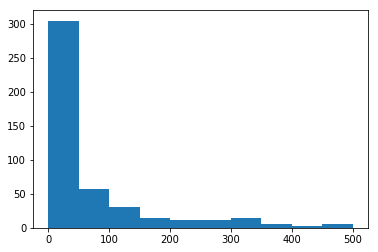

In [33]:
fraud = file[file["Class"] == 1]
amount = fraud[["Amount"]]
amount = amount.to_numpy()
print(len(amount))
plt.hist(amount, range=[0, 500])

In [89]:
# make data to numpy 
np_file = file.to_numpy()
np_class = np_file[:,30]
np_file = np_file[:,:30]


In [ ]:
faake = file[file['Class']==1]
legiit = file[file['Class']==0]

np_faake = faake.to_numpy()
np_legiit = legiit.to_numpy()

np_faake = np_faake[:,:30]
np_legiit = np_legiit[:,:30]

In [92]:
kmeans_faake = KMeans(n_clusters=1, random_state=0).fit(np_faake)
kmeans_legiit = KMeans(n_clusters=1, random_state=0).fit(np_legiit)

In [91]:
faake_centers = kmeans_faake.cluster_centers_
legiit_centers = kmeans_legiit.cluster_centers_

In [93]:
print(np.linalg.norm(faake_centers[0]-legiit_centers[0]))

96082.98126867657


In [97]:
dist_sum_faake = 0 
for i in range(0,len(np_faake)):
    dist_sum_faake += np.linalg.norm(faake_centers[0] - np_faake[i])
print(dist_sum_faake / len(np_faake))
print("-----")
dist_sum_legiit = 0 
for i in range(0,len(np_legiit)):
    dist_sum_legiit += np.linalg.norm(legiit_centers[0] - np_legiit[i])
print(dist_sum_legiit / len(np_legiit))

46656.31767843542
-----
53121.91465868519


In [101]:
#Mclust says 9 clusters on smaller data amount
kmeans = KMeans(n_clusters=9, random_state=0).fit(np_file)

In [105]:
#Adding cluster labels to the dataframe
cluster_labels = kmeans.labels_
file['Cluster Labels'] = cluster_labels

In [114]:
#Checking distribution of frauds in each Clusters
for i in range(0,9):
    cluster = file[file["Cluster Labels"] == i]
    fraud = cluster[cluster['Class'] == 1]
    display_this_shit = len(fraud)/len(cluster)
    print('Cluster Labels ' + str(i) + ' : ' + str(display_this_shit))

Cluster Labels 0 : 0.0024480165167379444
Cluster Labels 1 : 0.0016307893020221786
Cluster Labels 2 : 0.002551020408163265
Cluster Labels 3 : 0.0010454175862469508
Cluster Labels 4 : 0.0009671472179405809
Cluster Labels 5 : 0.0012744105851043893
Cluster Labels 6 : 0.001556838768115942
Cluster Labels 7 : 0.00449582530507386
Cluster Labels 8 : 0.0012485072196287048


284807